In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

# Functions

In [ ]:
def deg2PWM(desire_deg_angle, coefficents):
    a, b, c = coefficents
    pulse = round((a * desire_deg_angle**2) + (b * desire_deg_angle) + c, 0)
    return pulse

In [7]:
# function that take 3 angls in rad and transform them into deg
def rad2deg(rads):
  return [rads[0]*180/np.pi, rads[1]*180/np.pi, rads[2]*180/np.pi]
def deg2rad(deg):
  return deg*np.pi/180

In [ ]:
def legIK_for_botzo(x,y,z):
  D = np.sqrt((z**2 + y**2) - coxa**2)
  G = np.sqrt(D**2 + x**2)
  knee_angle = np.arccos((G**2 - femur**2 - tibia**2)/(-2*femur*tibia))
  shoulder_angle = np.arctan2(x,D) + np.arcsin((tibia * np.sin(knee_angle)) / G)
  adjustment = np.arccos((real_femur**2 + femur**2 - dist_focuspoint_servo_femurtibia**2) / (2 * real_femur * femur))


  coxa_angle = deg2rad(180)- (np.arctan2(y,z) + np.arctan2(D,coxa))
  femur_angle = deg2rad(90) - (shoulder_angle + adjustment)
  tibia_angle = np.pi - knee_angle + femur_angle + adjustment

  return rad2deg([coxa_angle, femur_angle, tibia_angle])

# Known Variables

In [ ]:
# load coefficents
a_SFR = 0.001
b_SFR =7.231
c_SFR = 563.085
coefficients_SFR = np.array([a_SFR, b_SFR, c_SFR])

a_FFR = 0
b_FFR = 7.348
c_FFR = 603.457
coefficients_FFR = np.array([a_FFR, b_FFR, c_FFR])

a_TFR = 0
b_TFR = 7.576
c_TFR = 554.285
coefficients_TFR = np.array([a_TFR, b_TFR, c_TFR])

In [5]:
# in cm
coxa = 3.1 # from shoulder servo to the 2 other servos in the shoulder
femur = 9.5 # from top sevo to kneww
tibia = 9.8 # from knee to foot
real_femur = 9.1 # lenght of 3D printed femur
dist_focuspoint_servo_femurtibia = 2.8 # distance from focus point/pivot of the 2 servos in the shoulder

# Angles to reach target

In [ ]:
def arduino(targets):
  for x,y,z in targets:
    print(f"\n  // x = {x}, y = {y}, z = {z}")
    angles = legIK_for_botzo(x,y,z)
    print(f"  // angles = {angles}")
    for i in range(len(angles)):
      if i == 0:
        print(f"  shoulder_angle_FR.writeMicroseconds({deg2PWM(angles[i], coefficients_SFR)});")
      elif i == 1:
        print(f"  femur_angle_FR.writeMicroseconds({deg2PWM(angles[i], coefficients_FFR)});")
      elif i == 2:
        print(f"  tibia_angle_FR.writeMicroseconds({deg2PWM(angles[i], coefficients_TFR)});")
    print("  delay(700);")

In [ ]:
# target
targets = [[0,5,15],[0,0,15],[0,-5,15]]
arduino(targets)


  // x = 0, y = 5, z = 15
  // angles = [82.87177465609184, 35.64386295406073, 125.89432175528812]
  shoulder_angle_FR.writeMicroseconds(1169.0);
  femur_angle_FR.writeMicroseconds(865.0);
  tibia_angle_FR.writeMicroseconds(1508.0);
  delay(700);

  // x = 0, y = 0, z = 15
  // angles = [101.92708155573257, 31.593685663626665, 129.7436527402937]
  shoulder_angle_FR.writeMicroseconds(1311.0);
  femur_angle_FR.writeMicroseconds(836.0);
  tibia_angle_FR.writeMicroseconds(1537.0);
  delay(700);

  // x = 0, y = -5, z = 15
  // angles = [119.74167230193585, 35.64386295406073, 125.89432175528812]
  shoulder_angle_FR.writeMicroseconds(1443.0);
  femur_angle_FR.writeMicroseconds(865.0);
  tibia_angle_FR.writeMicroseconds(1508.0);
  delay(700);


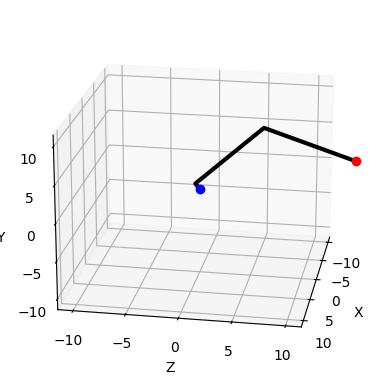

In [9]:
from mpl_toolkits import mplot3d
import numpy as np
from math import *
import matplotlib.pyplot as plt

def setupView(limit):
    ax = plt.axes(projection="3d")
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    return ax

# Set up notebook plotting
%matplotlib inline

# Set up the 3D plot
ax = setupView(11)
ax.view_init(elev=20., azim=10)

# Define leg parameters
l1 = 3.1
l2 = 0
l3 = 9.5
l4 = 9.8

# Foot target position
x = 0
y = 5
z = 15

def legIK(x, y, z):
    """
    x/y/z = Position of the Foot in Leg-Space

    F = Length of shoulder-point to target-point on x/y only
    G = length we need to reach to the point on x/y
    H = 3-Dimensional length we need to reach
    """
    F = sqrt(x**2 + y**2 - l1**2)
    G = F - l2
    H = sqrt(G**2 + z**2)

    theta1 = -atan2(y, x) - atan2(F, -l1)

    D = (H**2 - l3**2 - l4**2) / (2 * l3 * l4)
    theta3 = acos(D)

    theta2 = atan2(z, G) - atan2(l4 * sin(theta3), l3 + l4 * cos(theta3))

    return (theta1, theta2, theta3)

'''
def legIK(x,y,z):
  D = np.sqrt((z**2 + y**2) - coxa**2)
  G = np.sqrt(D**2 + x**2)
  tibia_angle = np.arccos((G**2 - femur**2 - tibia**2)/(-2*femur*tibia))
  femur_angle = np.arctan2(x,D) + np.arcsin((tibia * np.sin(tibia_angle)) / G)
  coxa_angle = np.arctan2(y,z) + np.arctan2(D,coxa)

  return rad2deg([coxa_angle, femur_angle, tibia_angle])
'''

def calcLegPoints(angles):
    (theta1, theta2, theta3) = angles
    theta23 = theta2 + theta3

    T0 = np.array([0, 0, 0, 1])
    T1 = T0 + np.array([-l1 * cos(theta1), l1 * sin(theta1), 0, 0])
    T2 = T1 + np.array([-l2 * sin(theta1), -l2 * cos(theta1), 0, 0])
    T3 = T2 + np.array([-l3 * sin(theta1) * cos(theta2), -l3 * cos(theta1) * cos(theta2), l3 * sin(theta2), 0])
    T4 = T3 + np.array([-l4 * sin(theta1) * cos(theta23), -l4 * cos(theta1) * cos(theta23), l4 * sin(theta23), 0])

    return np.array([T0, T1, T2, T3, T4])

def drawLegPoints(p):
    plt.plot([p[0][0], p[1][0], p[2][0], p[3][0], p[4][0]],
             [p[0][2], p[1][2], p[2][2], p[3][2], p[4][2]],
             [p[0][1], p[1][1], p[2][1], p[3][1], p[4][1]], 'k-', lw=3)
    plt.plot([p[0][0]], [p[0][2]], [p[0][1]], 'bo', lw=2)
    plt.plot([p[4][0]], [p[4][2]], [p[4][1]], 'ro', lw=2)
    plt.show()

# Calculate and draw leg points
drawLegPoints(calcLegPoints(legIK(x, y, z)))

# Show the plot
plt.show()